In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df=pd.read_csv('/Users/msyzdykova/Desktop/dataset DS project/final scraped df/final_df_new.csv')

In [ ]:
df

,Unnamed: 0,Player,Nation,Pos,Squad,Age,90s,Standard_Gls,Standard_Sh,Standard_SoT,...,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,League,Market Value
0,0,William Saliba,FRA,DF,Arsenal,22.0,38.0,2,10,3,...,26,0,1,0,213,72,49,0.595,EPL,80000000.0
1,1,James Tarkowski,ENG,DF,Everton,30.0,38.0,1,25,4,...,42,0,1,0,186,140,61,0.697,EPL,13000000.0
2,2,Joachim Andersen,DEN,DF,Crystal Palace,27.0,37.9,2,21,8,...,35,0,0,0,193,89,46,0.659,EPL,35000000.0
3,3,Florian Lejeune,FRA,DF,Rayo Vallecano,32.0,37.0,3,67,21,...,25,0,0,1,173,80,49,0.620,La Liga,3000000.0
4,4,Dominic Solanke,ENG,FW,Bournemouth,25.0,36.9,19,106,35,...,11,1,0,0,97,97,135,0.418,EPL,45000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,615,Andrey Santos,BRA,MF,Nott'ham Forest,19.0,0.1,0,2,0,...,0,0,0,0,0,0,0,0.000,EPL,18000000.0
616,616,César Tárrega,ESP,DF,Valencia,21.0,0.1,0,0,0,...,0,0,0,0,0,0,0,0.000,La Liga,4000000.0
617,617,Mikey Moore,ENG,MF,Tottenham,15.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0.000,EPL,1000000.0
618,618,Donny van de Beek,NED,DF,Manchester Utd,26.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0.000,EPL,5000000.0


In [ ]:
df=df[['Player', 'Nation',
 'Pos','Age', '90s','Standard_Gls', 'Standard_SoT','Standard_SoT/90','Standard_G/SoT', 'Expected_xG','Total_Cmp%','Total_TotDist',
 'Total_PrgDist','SCA_SCA90', 'GCA_GCA90','Tackles_Tkl',
 'Tackles_TklW','Challenges_Tkl%','Blocks_Sh',
 'Blocks_Pass','Clr','Int','Err','Take-Ons_Succ%', 'Take-Ons_Tkld%','Performance_CrdY',
'Performance_CrdR','Performance_Fls','Performance_Fld','Performance_Off','Performance_Recov','Aerial Duels_Won%', 'League', 'Market Value']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             620 non-null    object 
 1   Nation             620 non-null    object 
 2   Pos                620 non-null    object 
 3   Age                620 non-null    float64
 4   90s                620 non-null    float64
 5   Standard_Gls       620 non-null    int64  
 6   Standard_SoT       620 non-null    int64  
 7   Standard_SoT/90    620 non-null    float64
 8   Standard_G/SoT     620 non-null    float64
 9   Expected_xG        620 non-null    float64
 10  Total_Cmp%         620 non-null    float64
 11  Total_TotDist      620 non-null    int64  
 12  Total_PrgDist      620 non-null    int64  
 13  SCA_SCA90          620 non-null    float64
 14  GCA_GCA90          620 non-null    float64
 15  Tackles_Tkl        620 non-null    int64  
 16  Tackles_TklW       620 non

In [ ]:
df[df.isnull().any(axis=1)]

,Player,Nation,Pos,Age,90s,Standard_Gls,Standard_SoT,Standard_SoT/90,Standard_G/SoT,Expected_xG,...,Take-Ons_Tkld%,Performance_CrdY,Performance_CrdR,Performance_Fls,Performance_Fld,Performance_Off,Performance_Recov,Aerial Duels_Won%,League,Market Value


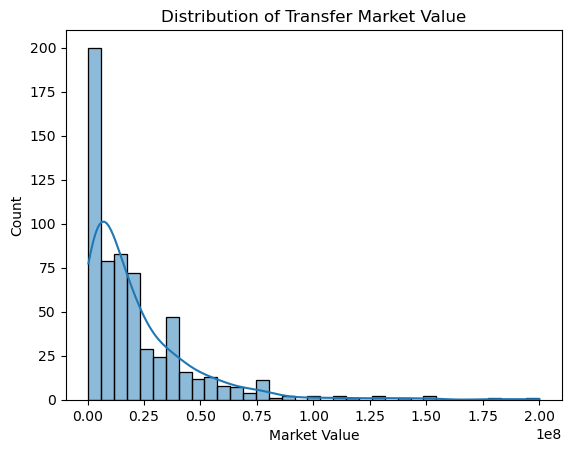

In [ ]:
#Distribution of Transfer Market Value
sns.histplot(df['Market Value'], kde=True)
plt.title('Distribution of Transfer Market Value')
plt.show()

In [ ]:
highest_value_players = df.loc[df.groupby('League')['Market Value'].idxmax()]

highest_value_players[['League', 'Player', 'Market Value']]

,League,Player,Market Value
102,EPL,Erling Haaland,200000000.0
146,La Liga,Jude Bellingham,180000000.0


In [ ]:
df['Pos'].unique()

array(['DF', 'FW', 'MF'], dtype=object)

Defenders, Midfielder, Forward

In [ ]:
df.groupby(['League'])['Player'].count().reset_index()

,League,Player
0,EPL,336
1,La Liga,284


In [ ]:
df.groupby(['League','Pos'])['Player'].count().reset_index()

,League,Pos,Player
0,EPL,DF,132
1,EPL,FW,95
2,EPL,MF,109
3,La Liga,DF,113
4,La Liga,FW,73
5,La Liga,MF,98


Distribution of observations per league is 54% (EPL) - 46% (La Liga)

In [ ]:
df.groupby('League')['Market Value'].sum().reset_index()

,League,Market Value
0,EPL,9.331400e+09
1,La Liga,3.774900e+09


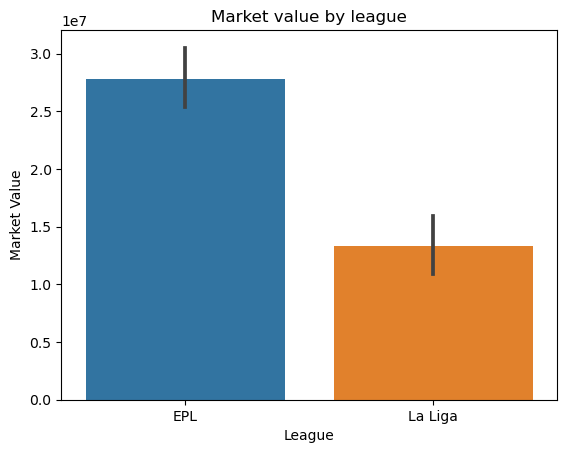

In [ ]:
# Market Value by League
sns.barplot(x='League', y='Market Value', data=df)
plt.title('Market value by league')
plt.show()

The Total MV of 336 EPL players is EUR 9.33B whereas it is EUR 3.77B for 284 Laliga players. On average, EPL players are valued at ~EUR 27.77M and La liga players - ~EUR 13.29M. That is ~EUR 14M difference!

In [ ]:
df.groupby(['League','Pos'])['Market Value'].mean().reset_index()

,League,Pos,Market Value
0,EPL,DF,2.127576e+07
1,EPL,FW,3.489474e+07
2,EPL,MF,2.943119e+07
3,La Liga,DF,9.186726e+06
4,La Liga,FW,1.570959e+07
5,La Liga,MF,1.622449e+07


In [ ]:
df.groupby(['League'])['Market Value'].mean().reset_index()

,League,Market Value
0,EPL,2.777202e+07
1,La Liga,1.329190e+07


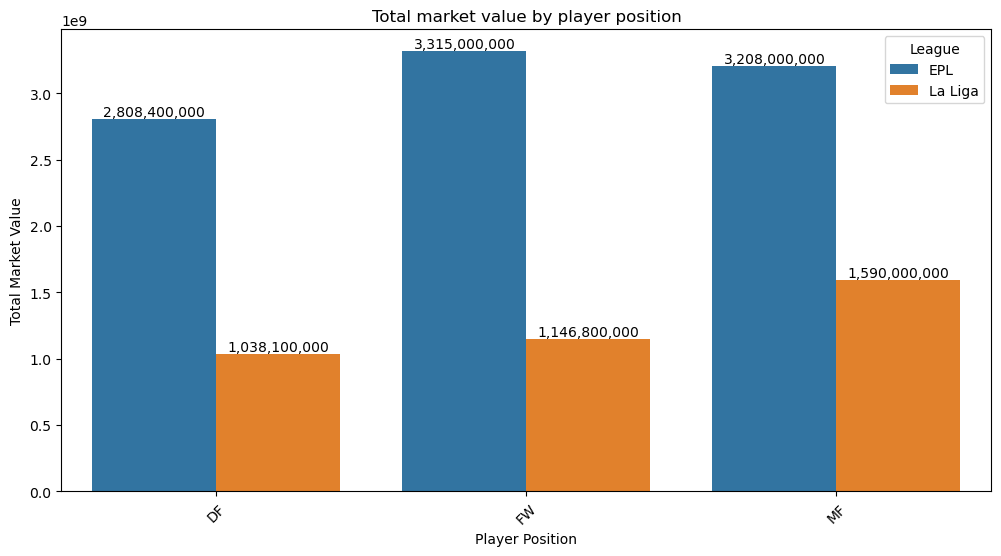

In [ ]:
# Group by Position and League, and calculate the total market value
position_market_value = df.groupby(['Pos', 'League'])['Market Value'].sum().reset_index()

# Create the bar plot for the sum of market value
plt.figure(figsize=(12, 6))
sns.barplot(x='Pos', y='Market Value', hue='League', data=position_market_value)
plt.title('Total market value by player position')
plt.xlabel('Player Position')
plt.ylabel('Total Market Value')


for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():,.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


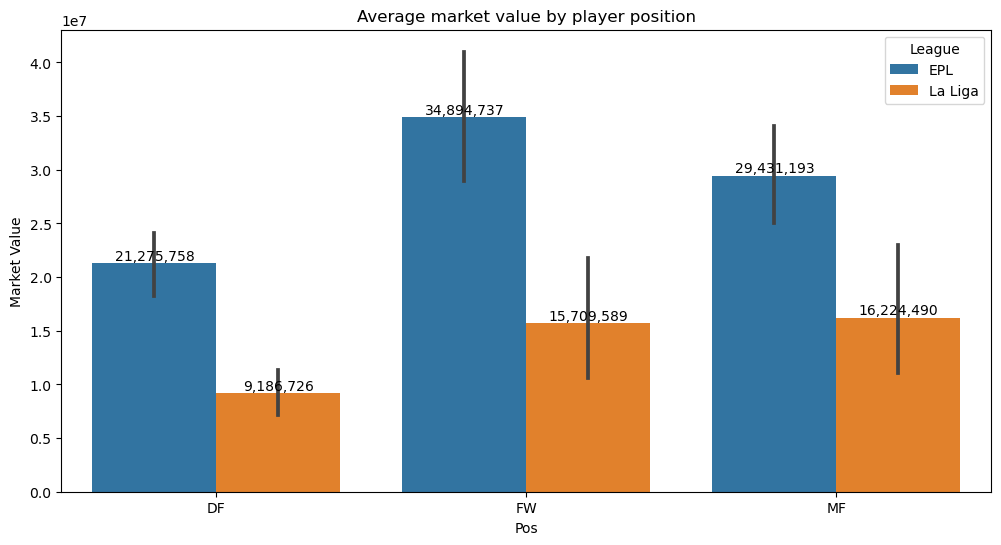

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Pos', y='Market Value',hue='League', data=df)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():,.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.title('Average market value by player position')
plt.show()

In EPL, the total and average investment in forwards is the highest among the other players. In La liga, the highest amount spent was on Midfielders, followed by forwards. In both the leagues, the total and average investment is lowest in the defenders among all the other types of players.

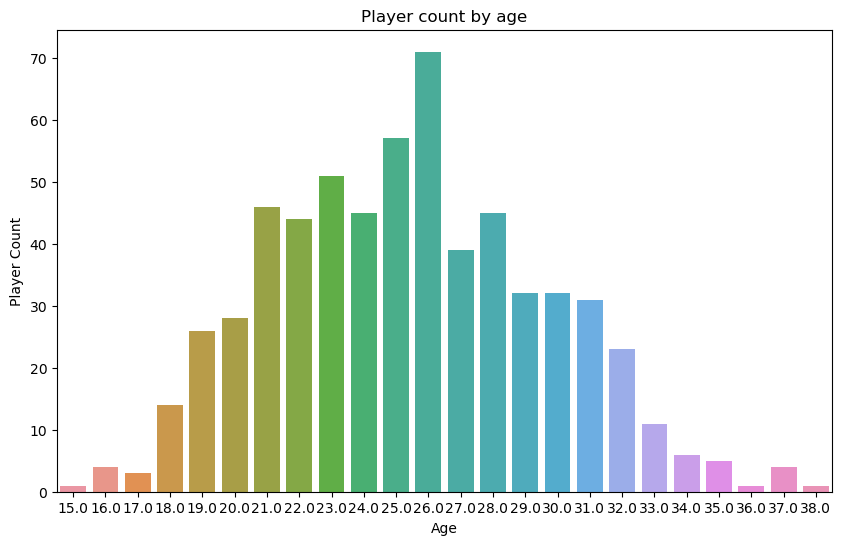

In [ ]:
player_count_by_age=df.groupby('Age')['Player'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Player', data=player_count_by_age)
plt.title('Player count by age')
plt.xlabel('Age')
plt.ylabel('Player Count')
plt.show()

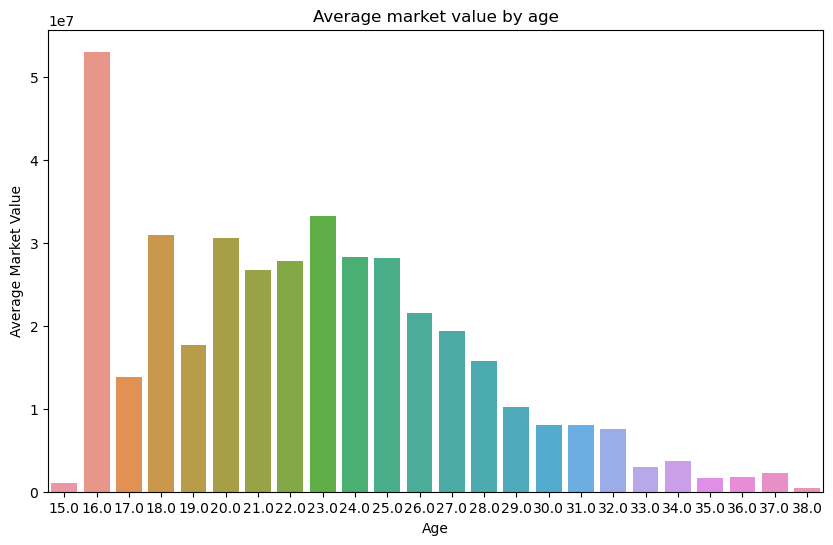

In [ ]:
age_market_value = df.groupby('Age')['Market Value'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Market Value', data=age_market_value)
plt.title('Average market value by age')
plt.xlabel('Age')
plt.ylabel('Average Market Value')
plt.show()

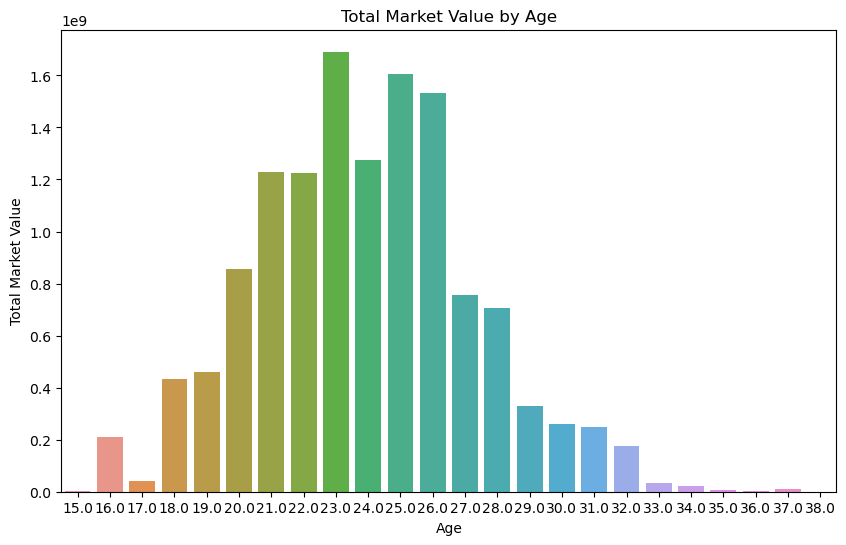

In [ ]:
age_market_value = df.groupby('Age')['Market Value'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Market Value', data=age_market_value)
plt.title('Total Market Value by Age')
plt.xlabel('Age')
plt.ylabel('Total Market Value')
plt.show()


* The general pattern is: High investment is made on players in their early to mid 20s. In football, 22-28 is considered a prime age to excel in the sport.
* Age 23 seems to be the best : Highest number of players in the dataset - so we could infer that players aged 23 have great potential and are high in demand.
* Naturally, with age, the total and average MV declines.

In [ ]:
df['Nation'].nunique()

64

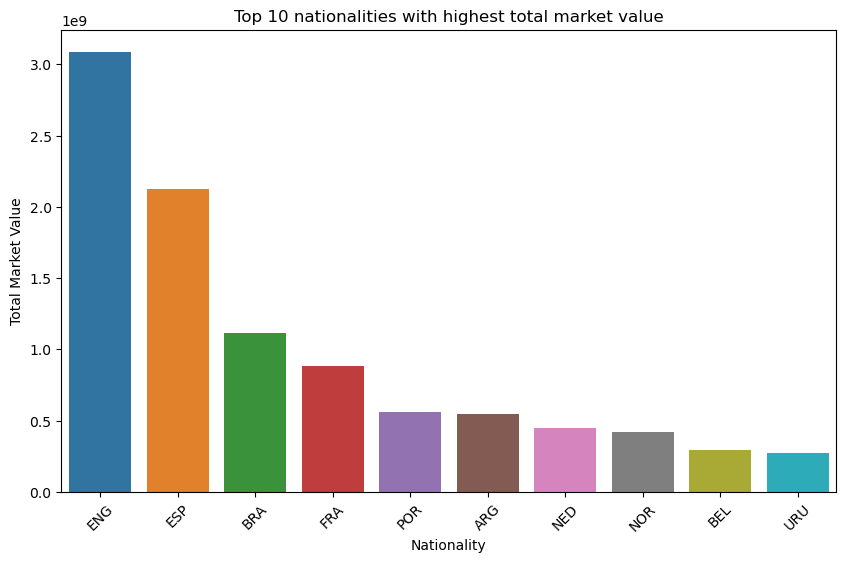

In [ ]:
nation_total_market_value = df.groupby('Nation')['Market Value'].sum().reset_index()
top_5_nations_by_sum = nation_total_market_value.sort_values(by='Market Value', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Nation', y='Market Value', data=top_5_nations_by_sum)
plt.title('Top 10 nationalities with highest total market value')
plt.xlabel('Nationality')
plt.ylabel('Total Market Value')
plt.xticks(rotation=45)
plt.show()


This bar chart shows the top 10 nationalities with the highest total market value, with English and Spanish players ranking at the top due to the data being from the EPL and La Liga, where domestic players naturally hold higher value. The remaining countries, such as Brazil, France, Portugal, and Argentina, are traditional football powerhouses. Despite not being domestic players in these leagues, their players still command high market values due to their talent and prominence in global football.

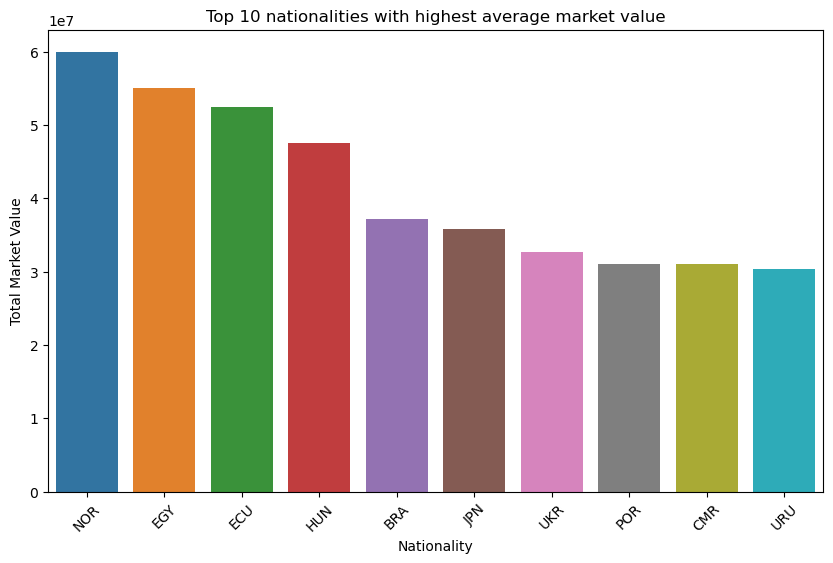

In [ ]:
nation_total_market_value_mean = df.groupby('Nation')['Market Value'].mean().reset_index()
top_5_nations_by_mean = nation_total_market_value_mean.sort_values(by='Market Value', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Nation', y='Market Value', data=top_5_nations_by_mean)
plt.title('Top 10 nationalities with highest average market value')
plt.xlabel('Nationality')
plt.ylabel('Total Market Value')
plt.xticks(rotation=45)
plt.show()

The top 10 average market value by nation are countries not trationally considered as football powerhouse because these are driven by specific outlier players such as Erling Haaland	(Norway) and Mohamed Salah (Egypt).

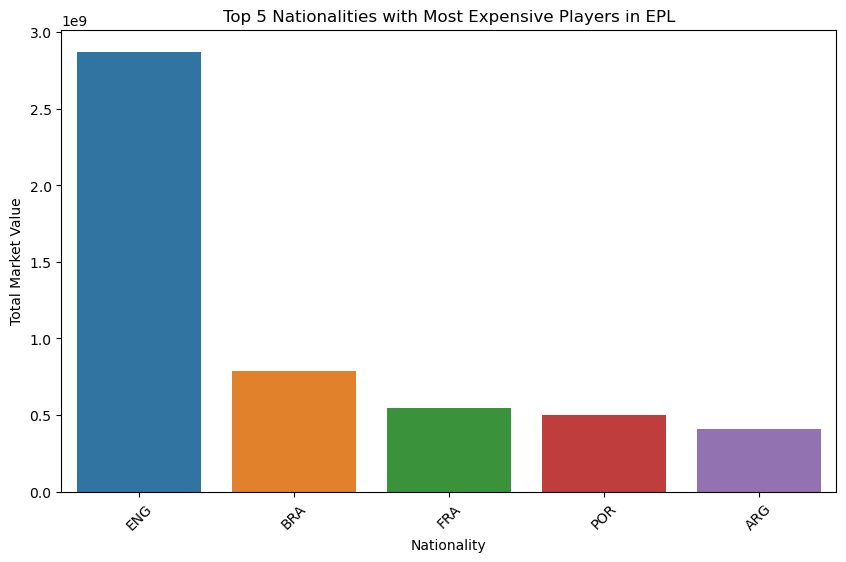

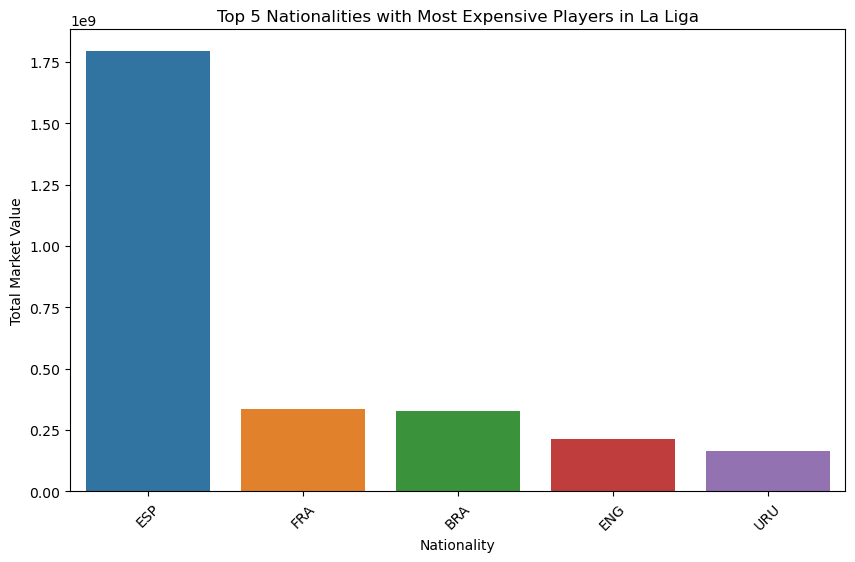

In [ ]:
nation_league_market_value = df.groupby(['Nation', 'League'])['Market Value'].sum().reset_index()

nation_league_market_value = nation_league_market_value.sort_values(by=['League', 'Market Value'], ascending=[True, False])

top_5_nations_per_league = nation_league_market_value.groupby('League').head(5)

leagues = top_5_nations_per_league['League'].unique()

for league in leagues:
    league_data = top_5_nations_per_league[top_5_nations_per_league['League'] == league]

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Nation', y='Market Value', data=league_data)
    plt.title(f'Top 5 Nationalities with Most Expensive Players in {league}')
    plt.xlabel('Nationality')
    plt.ylabel('Total Market Value')
    plt.xticks(rotation=45)
    plt.show()


* English and Spanish players dominate the football market in EPL and La Liga in terms of total market value. This can be explained by the popularity and strength of the EPL and La Liga, along with the cultural emphasis on domestic talent.
* Brazilian and French players are highly valued in both leagues, indicating their global desirability and versatility across top European leagues.
* The EPL has a significantly higher total market value for English players compared to La Liga’s total for Spanish players, which reflects the enormous financial power and domestic market demand within the EPL.

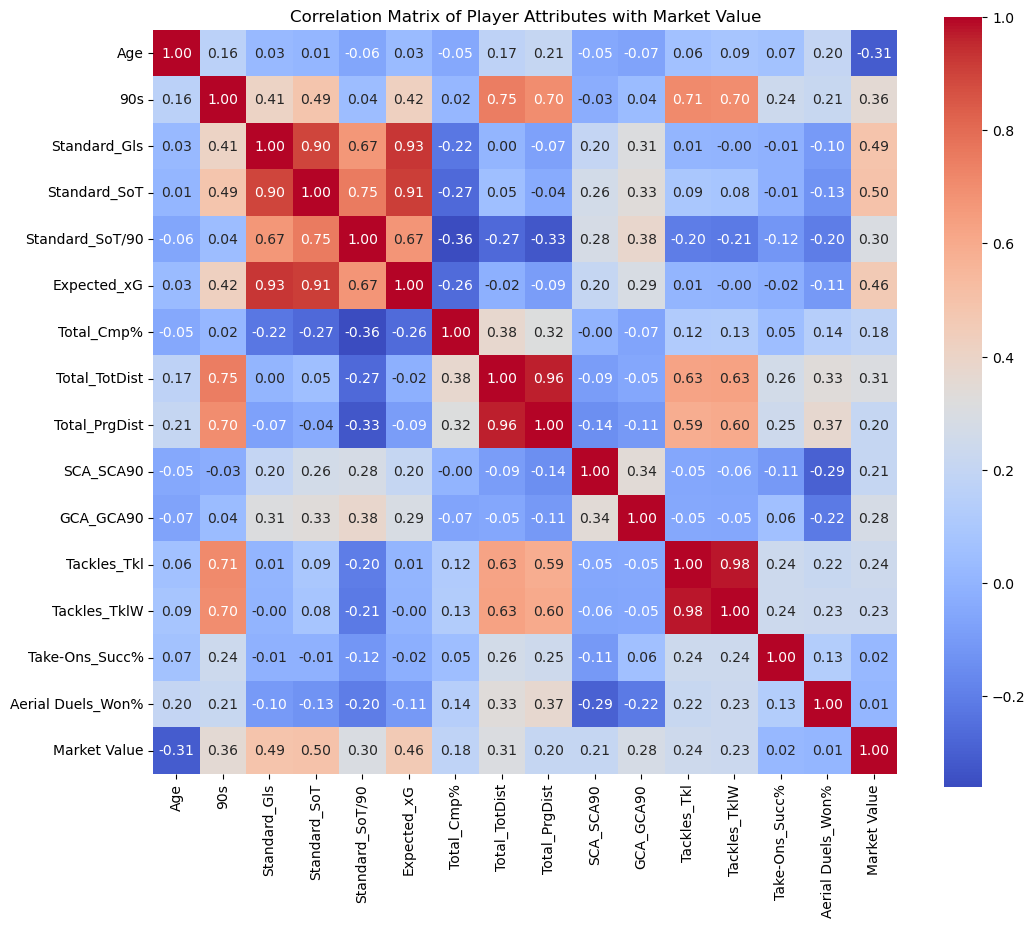

In [ ]:
correlation_columns = [
    'Age', '90s', 'Standard_Gls', 'Standard_SoT',
    'Standard_SoT/90', 'Expected_xG', 'Total_Cmp%',
    'Total_TotDist', 'Total_PrgDist', 'SCA_SCA90',
    'GCA_GCA90', 'Tackles_Tkl', 'Tackles_TklW',
    'Take-Ons_Succ%', 'Aerial Duels_Won%', 'Market Value'
]

correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Player Attributes with Market Value')
plt.show()

* Attacking metrics (goals, shots on target, and expected goals) have the highest correlations with market value, indicating that offensive contributions are most important in determining a player’s worth.
*  The number of matches played has a positive correlation, suggesting that consistent game time can boost a player's market value due to increased visibility and impact on games.
* Progressive play (Total_TotDist, Total_PrgDist, SCA_SCA90) adds moderate value, showing that moving the ball forward and creating shots are important secondary factors.
* Defensive metrics are less influential in determining market value, especially when compared to attacking contributions.
* These observations are consistent with our previous findings: attacking metrics have a high correlation with market value, indicating that there is a high demand for attackers, who are typically forwards. Progressive play shows a moderate correlation with market value, which is reflected in the investment made in midfielders, while defensive metrics have a lower correlation, aligning with the relatively lower investment in defenders.

In [ ]:
#One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Nation', 'Pos','League'])

print(df_encoded.head())
print(df_encoded.columns)

one_hot_columns = [col for col in df_encoded.columns if 'League_' in col or 'Pos_' in col or 'Nation_' in col]

df_encoded[one_hot_columns] = df_encoded[one_hot_columns].astype(int)

             Player   Age   90s  Standard_Gls  Standard_SoT  Standard_SoT/90  \
0    William Saliba  22.0  38.0             2             3             0.08   
1   James Tarkowski  30.0  38.0             1             4             0.11   
2  Joachim Andersen  27.0  37.9             2             8             0.21   
3   Florian Lejeune  32.0  37.0             3            21             0.57   
4   Dominic Solanke  25.0  36.9            19            35             0.95   

   Standard_G/SoT  Expected_xG  Total_Cmp%  Total_TotDist  ...  Nation_UKR  \
0            0.67          1.6       0.924          43599  ...           0   
1            0.25          2.6       0.771          25219  ...           0   
2            0.25          1.7       0.784          37874  ...           0   
3            0.14          3.3       0.806          35738  ...           0   
4            0.49         19.6       0.735           5026  ...           0   

   Nation_URU  Nation_USA  Nation_VEN  Nation_WAL 

In [ ]:
numeric_df = df_encoded.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

market_value_corr = corr_matrix['Market Value'].sort_values(ascending=False)

print("Top positively correlated variables:\n", market_value_corr.head(5))
print("Top negatively correlated variables:\n", market_value_corr.tail(5))

Top positively correlated variables:
 Market Value       1.000000
Standard_SoT       0.498823
Standard_Gls       0.490303
Expected_xG        0.458672
Performance_Fld    0.361837
Name: Market Value, dtype: float64
Top negatively correlated variables:
 Nation_SRB       -0.046449
Pos_DF           -0.177426
Nation_ESP       -0.238542
League_La Liga   -0.291156
Age              -0.306874
Name: Market Value, dtype: float64
